# Machine Learning from Scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

## KNN - K Nearest Neighbors

In [22]:

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        '''
        X: training data
        y: training labels
        '''
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self, x):
        # Compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    

In [23]:
# Load iris from sklearn
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

# Train model
clf = KNN(k=3)
clf.fit(X_train, y_train)

# Predictions
predictions = clf.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9666666666666667


## k-Means Clustering

[array([ 6.26067992, -4.85727571]), array([-1.29998318, -8.07267049]), array([-0.9702231, -8.0975618]), array([-1.95427307, -2.45867753]), array([6.86917324, 4.42122308])]


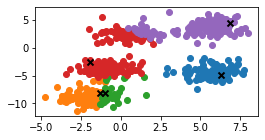

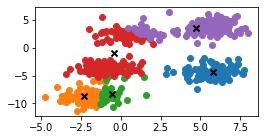

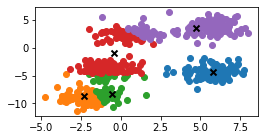

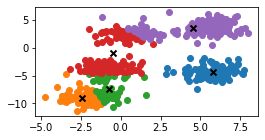

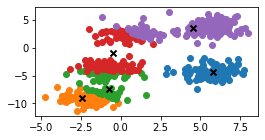

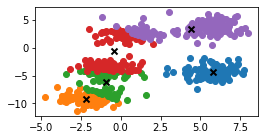

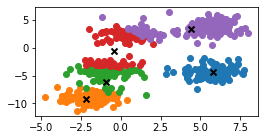

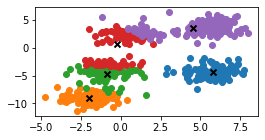

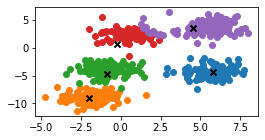

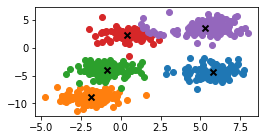

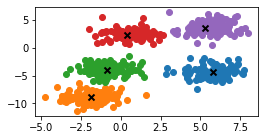

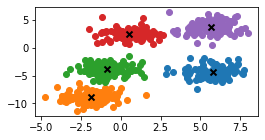

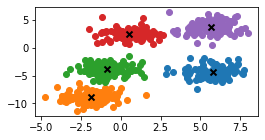

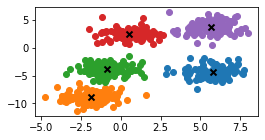

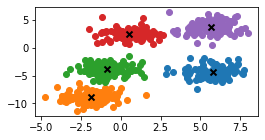

In [38]:
# k-means from scratch
class k_means:
    def __init__(self, k=3, max_iters=100, plot_steps=False):
        self.k = k
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        
        # List of sample indices for each cluster
        self.clusters = [[] for _ in range(self.k)]
        # Mean feature vector for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # Initialize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        print(self.centroids)

        
        # Optimization
        for _ in range(self.max_iters):
            # Update clusters
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            
            # Update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self.plot_steps:
                self.plot()
            
            # Check if converged
            if self._is_converged(centroids_old, self.centroids):
                break
        
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)
    
    def _get_cluster_labels(self, clusters):
        # Empty label array
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    def _create_clusters(self, centroids):
        # Assign samples to closest centroids (create clusters)
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        # Compute distances between sample and centroids
        distances = [euclidean_distance(sample, point) for point in centroids]
        # Find closest centroid
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        # Compute mean of each cluster
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        # Check if centroids have changed
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(4, 2))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)
        plt.show()
    

# Load data
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=5, n_samples=510, n_features=2, shuffle=True, random_state=40)

# Train model

clf = k_means(k=5, max_iters=150, plot_steps=True)
y_pred = clf.predict(X)

# Plot
clf.plot()

